202007D no ciliates bloom timing

In [1]:
import datetime as dt
from erddapy import ERDDAP
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from pathlib import Path
import xarray as xr

from salishsea_tools import places

%matplotlib inline

### Set up Model Results Getting

In [2]:
directory = '202007D-nociliates'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")

In [3]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [4]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    S3y, S3x = places.PLACES['S3']['NEMO grid ji'][0], places.PLACES['S3']['NEMO grid ji'][1]
    fourkm = 8
    timeseries = ds.isel(deptht = 1, y = slice(S3y-fourkm, S3y+fourkm+1), 
                             x =  slice(S3x-fourkm, S3x+fourkm+1))
    
    return timeseries

### Set up Observations Getting

In [5]:
server = "https://salishsea.eos.ubc.ca/erddap"

protocol = "tabledap"

dataset_id = "ubcONCTWDP1mV18-01"

response = "nc"

variables = [
    "latitude",
    "longitude",
    "chlorophyll",
    "time",
]

fourkmlat = 4/110.574
fourkmlon = 4/(111.320*np.cos(50*np.pi/180.))
lon, lat = places.PLACES['S3']['lon lat']

### Plotting Functions

In [6]:
def model_plot(timeseries2015):
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    for i in range(timeseries2015.x.shape[0]):
        for j in range(timeseries2015.y.shape[0]):
            timeseries2015.diatoms[:, j, i].plot(ax=axs[0], color='blue', marker='o')
            timeseries2015.diatoms[:, j, i].plot(ax=axs[1], color='blue', marker='o')
    ax2 = axs[0].twinx()
    for i in range(timeseries2015.x.shape[0]):
        for j in range(timeseries2015.y.shape[0]):
            timeseries2015.nitrate[:, j, i].plot(ax=ax2, color='lightblue', marker='o')
    axs[0].grid()
    for i in range(timeseries2015.x.shape[0]):
        for j in range(timeseries2015.y.shape[0]):
            (timeseries2015.diatoms+timeseries2015.flagellates+timeseries2015.ciliates)[:, j, i].plot(ax=axs[1], color='purple', marker='o', alpha=0.5);

In [7]:
def model_obs_comparison(timeseries2015, obs_pd, N2Chl=2.5):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    obs_pd['chlorophyll (ug/l)'].plot(ax=ax, marker='o', color='green', linewidth=0);
    for i in range(timeseries2015.x.shape[0]):
        for j in range(timeseries2015.y.shape[0]):
            ((timeseries2015.diatoms+timeseries2015.flagellates+timeseries2015.ciliates)[:, j, i]*N2Chl).plot(ax=ax, color='purple', 
                                                                                                              marker='.', alpha=0.5, linewidth=0);

# 2015

## Model Results

In [8]:
year = 2015
months_regex = '0[23]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [9]:
timeseries.load(scheduler='processes', num_workers=4);

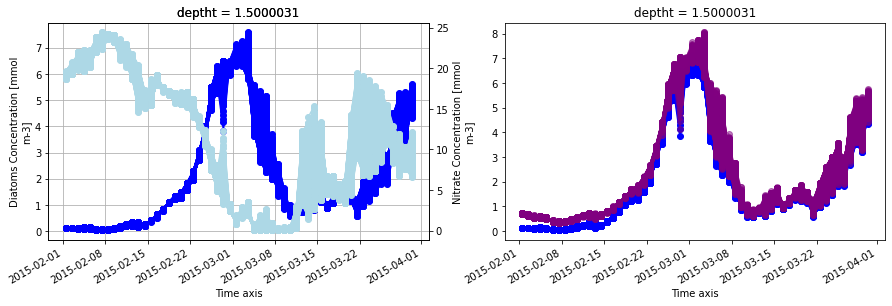

In [10]:
model_plot(timeseries)

## Observations

In [11]:
constraints = {
    "time>=": "2015-02-01T00:00:00Z",
    "time<=": "2015-04-01T00:00:00Z",
    "latitude>=": lat - fourkmlat,
    "latitude<=": lat + fourkmlat,
    "longitude>=": lon - fourkmlon,
    "longitude<=": lon + fourkmlon,
}

In [12]:
obs = ERDDAP(server=server, protocol=protocol,)

obs.dataset_id = dataset_id
obs.variables = variables
obs.constraints = constraints

In [13]:
obs_pd = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()

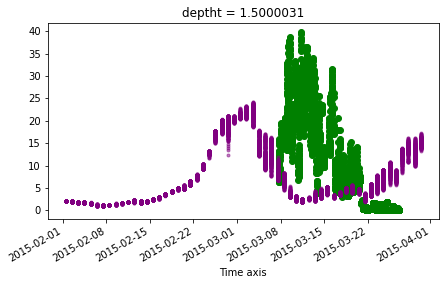

In [14]:
model_obs_comparison(timeseries, obs_pd, N2Chl=3)

# 2016

## Model Results

In [15]:
year = 2016
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [16]:
timeseries.load(scheduler='processes', num_workers=4);

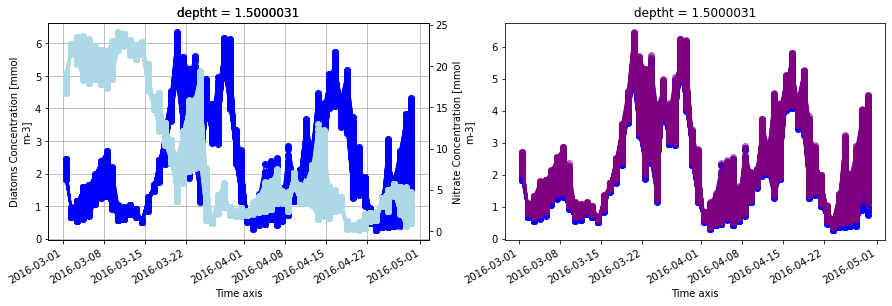

In [17]:
model_plot(timeseries)

## Observations

In [18]:
constraints = {
    "time>=": "2016-03-01T00:00:00Z",
    "time<=": "2016-05-01T00:00:00Z",
    "latitude>=": lat - fourkmlat,
    "latitude<=": lat + fourkmlat,
    "longitude>=": lon - fourkmlon,
    "longitude<=": lon + fourkmlon,
}

In [19]:
obs = ERDDAP(server=server, protocol=protocol,)

obs.dataset_id = dataset_id
obs.variables = variables
obs.constraints = constraints

In [20]:
obs_pd = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()

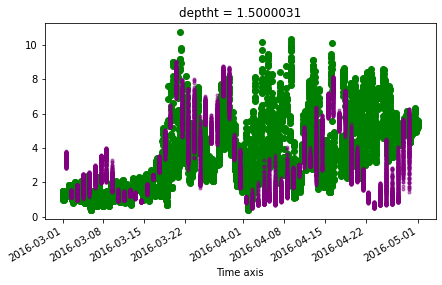

In [21]:
model_obs_comparison(timeseries, obs_pd, N2Chl=1.4)

# 2017

## Model Results

In [22]:
year = 2017
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [23]:
timeseries.load(scheduler='processes', num_workers=4);

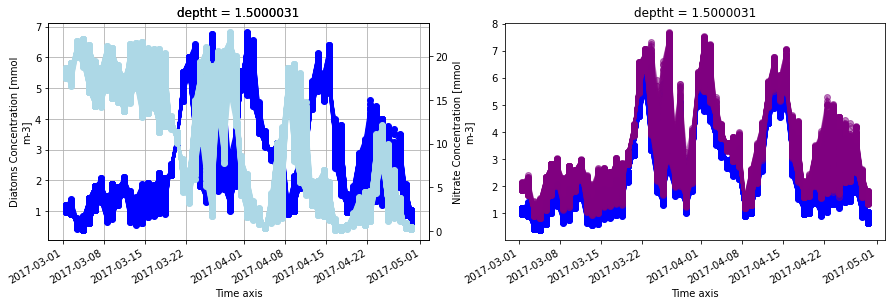

In [24]:
model_plot(timeseries)

## Observations

In [25]:
constraints = {
    "time>=": "2017-03-01T00:00:00Z",
    "time<=": "2017-05-01T00:00:00Z",
    "latitude>=": lat - fourkmlat,
    "latitude<=": lat + fourkmlat,
    "longitude>=": lon - fourkmlon,
    "longitude<=": lon + fourkmlon,
}
obs = ERDDAP(server=server, protocol=protocol,)

obs.dataset_id = dataset_id
obs.variables = variables
obs.constraints = constraints

In [26]:
obs_pd = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()

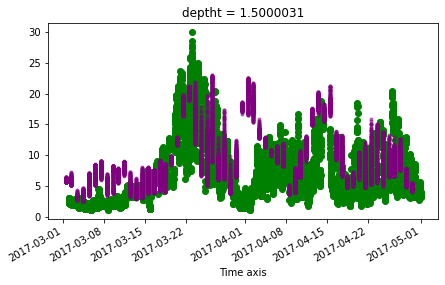

In [29]:
model_obs_comparison(timeseries, obs_pd, N2Chl=3)

2015 bloom is early, other blooms are good timing.  Would have been nice to see either of 2016 or 2017 early.